In [21]:
from scipy import stats
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

<hr>

In [58]:
# ex 1
a = "2,9; 3,4; 3,5; 4,1; 4,6; 4,7; 4,5; 3,8; 5,3; 4,9; 4,8; 5,7; 5,8; 5,0; 3,4; 5,9; 6,3; 4,6; 5,5; 6,2"

In [59]:
amostras = list(map(float, a.replace(',', '.').split('; ')))

In [60]:
n = len(amostras)

In [61]:
mu = sum(amostras) / n

In [62]:
s = 2

In [63]:
np.array(stats.norm.interval(.96, 0, 1)) * s / sqrt(n) + mu

array([3.82653557, 5.66346443])

In [66]:
# se for sigma fosse desconhecido, usaríamos t-student
np.array(stats.t.interval(.96, n - 1, 0, 1)) * s / sqrt(n) + mu

array([3.75902758, 5.73097242])

<hr>

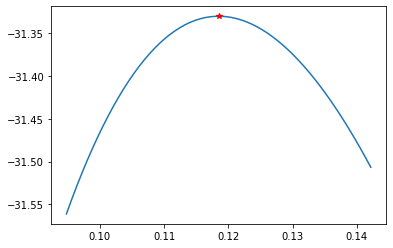

In [35]:
# ex 2
"""
calcule o estimador de máxima verossimilhança da média e da variância
do intervalo de tempo entre as chegadas de barcos em um porto secundário do Rio de Janeiro.
Suponha que essa variável tem distribuição exponencial
"""
amostras = [7.6, 11.8, 1.5, 1.4, 4.4, 28.9, 12.3, 5.4, 9.6, 1.5]
n = len(amostras)
x = sorted(amostras)
_lambda = n / sum(amostras)


ll = []
lambdas = np.linspace(_lambda * .8, _lambda * 1.2, 60)
for l in lambdas:
    pdf = stats.expon.pdf(x, 0, 1 / l)
    ll.append(np.sum(np.log(pdf))) # ll abreviação para log-likelihood
    # para calcular a verossimilhança (sem log), troque np.sum(np.log(pdf)) por np.prod(pdf)
    
plt.plot(lambdas, ll)


_lambda_pdf = np.sum(np.log(stats.expon.pdf(x, 0 , 1 / _lambda)))
plt.plot([_lambda], [_lambda_pdf], 'r*') # mostra local do nosso estimador calculado
# podemos ver que média amostral calculada é uma boa estimativa.

<hr>

In [45]:
# ex 3
interval = stats.norm.interval(.85, 0, 1)
interval

(-1.4395314709384557, 1.4395314709384563)

In [ ]:
# vamos chamar de zi o valor positivo desse intervalo
# lembre que a máxima variância é quando p(1-p) = 1/4
# então temos

$IC_p(85\%) = (p - z_i\sqrt{(1/4)/n}; p + z_i\sqrt{(1/4)/n})$

E queremos amplitude menor que 0,1 ou seja:

$(p + z_i\sqrt{(1/4)/n}) - (p - z_i\sqrt{(1/4)/n}) < 0.1$

$2 . z_i\sqrt{(1/4)/n} < 0.1$

$z_i\sqrt{1/n} < 0.1$

$100.z_i^2 < n$

In [48]:
from math import ceil

zi = interval[1]

print('n >', ceil(zi ** 2 * 100))

n > 208


<hr>